In [1]:
import pandas as pd
import numpy as np

In [3]:
emotion_df = pd.read_csv('Data Chunks/2021-2022_6h_merged_emotions_pct.csv', index_col=0, parse_dates=True)
tweet_count_df = pd.read_csv('Data Chunks/2021-2022_6h_tweet_counts.csv', index_col=0, parse_dates=True)
price_IQR_df = pd.read_csv('Data Chunks/price_IQR_6h.csv', index_col=0, parse_dates=True)

emotion_df.index = emotion_df.index.tz_convert(None)

combined_aux_df = tweet_count_df.join(emotion_df, how='inner')
combined_df = combined_aux_df.join(price_IQR_df, how='inner')
combined_df

,Tweet Count,Excitement,Optimism,Neutral,Fear,Anger,IQR,Price
2021-01-01 00:00:00,134.500000,0.275274,0.317093,0.193666,0.096630,0.117337,1.129949,29195.506944
2021-01-01 06:00:00,147.906250,0.246790,0.334029,0.205843,0.095197,0.118141,1.117828,29164.979833
2021-01-01 12:00:00,161.312500,0.224549,0.321198,0.211056,0.111076,0.132122,1.108402,29315.151333
2021-01-01 18:00:00,174.718750,0.204620,0.309793,0.227257,0.113638,0.144692,1.117765,29173.845750
2021-01-02 00:00:00,188.125000,0.196875,0.299669,0.237311,0.115084,0.151061,1.057666,29321.784806
...,...,...,...,...,...,...,...,...
2022-06-29 00:00:00,88.733333,0.130970,0.264646,0.247174,0.173807,0.183404,0.642086,20310.903750
2022-06-29 06:00:00,86.450000,0.127885,0.263404,0.245622,0.174979,0.188110,0.663551,20072.581111
2022-06-29 12:00:00,84.166667,0.127193,0.262001,0.247344,0.172408,0.191054,0.655473,20060.425306
2022-06-29 18:00:00,81.883333,0.127662,0.262337,0.245169,0.173290,0.191542,0.654190,20181.761389


In [4]:
combined_df.columns

Index(['Tweet Count', 'Excitement', 'Optimism', 'Neutral', 'Fear', 'Anger',
       'IQR', 'Price'],
      dtype='object')

In [5]:
df = combined_df.copy()

In [6]:
df['Price'] = df['Price'].pct_change().fillna(0)
df

,Tweet Count,Excitement,Optimism,Neutral,Fear,Anger,IQR,Price
2021-01-01 00:00:00,134.500000,0.275274,0.317093,0.193666,0.096630,0.117337,1.129949,0.000000
2021-01-01 06:00:00,147.906250,0.246790,0.334029,0.205843,0.095197,0.118141,1.117828,-0.001046
2021-01-01 12:00:00,161.312500,0.224549,0.321198,0.211056,0.111076,0.132122,1.108402,0.005149
2021-01-01 18:00:00,174.718750,0.204620,0.309793,0.227257,0.113638,0.144692,1.117765,-0.004820
2021-01-02 00:00:00,188.125000,0.196875,0.299669,0.237311,0.115084,0.151061,1.057666,0.005071
...,...,...,...,...,...,...,...,...
2022-06-29 00:00:00,88.733333,0.130970,0.264646,0.247174,0.173807,0.183404,0.642086,-0.000774
2022-06-29 06:00:00,86.450000,0.127885,0.263404,0.245622,0.174979,0.188110,0.663551,-0.011734
2022-06-29 12:00:00,84.166667,0.127193,0.262001,0.247344,0.172408,0.191054,0.655473,-0.000606
2022-06-29 18:00:00,81.883333,0.127662,0.262337,0.245169,0.173290,0.191542,0.654190,0.006049


In [7]:
df = df.reset_index()
df

,index,Tweet Count,Excitement,Optimism,Neutral,Fear,Anger,IQR,Price
0,2021-01-01 00:00:00,134.500000,0.275274,0.317093,0.193666,0.096630,0.117337,1.129949,0.000000
1,2021-01-01 06:00:00,147.906250,0.246790,0.334029,0.205843,0.095197,0.118141,1.117828,-0.001046
2,2021-01-01 12:00:00,161.312500,0.224549,0.321198,0.211056,0.111076,0.132122,1.108402,0.005149
3,2021-01-01 18:00:00,174.718750,0.204620,0.309793,0.227257,0.113638,0.144692,1.117765,-0.004820
4,2021-01-02 00:00:00,188.125000,0.196875,0.299669,0.237311,0.115084,0.151061,1.057666,0.005071
...,...,...,...,...,...,...,...,...,...
2176,2022-06-29 00:00:00,88.733333,0.130970,0.264646,0.247174,0.173807,0.183404,0.642086,-0.000774
2177,2022-06-29 06:00:00,86.450000,0.127885,0.263404,0.245622,0.174979,0.188110,0.663551,-0.011734
2178,2022-06-29 12:00:00,84.166667,0.127193,0.262001,0.247344,0.172408,0.191054,0.655473,-0.000606
2179,2022-06-29 18:00:00,81.883333,0.127662,0.262337,0.245169,0.173290,0.191542,0.654190,0.006049


In [10]:
df = df.rename(columns={'index': 'date'})
df

,date,Tweet Count,Excitement,Optimism,Neutral,Fear,Anger,IQR,Price
0,2021-01-01 00:00:00,134.500000,0.275274,0.317093,0.193666,0.096630,0.117337,1.129949,0.000000
1,2021-01-01 06:00:00,147.906250,0.246790,0.334029,0.205843,0.095197,0.118141,1.117828,-0.001046
2,2021-01-01 12:00:00,161.312500,0.224549,0.321198,0.211056,0.111076,0.132122,1.108402,0.005149
3,2021-01-01 18:00:00,174.718750,0.204620,0.309793,0.227257,0.113638,0.144692,1.117765,-0.004820
4,2021-01-02 00:00:00,188.125000,0.196875,0.299669,0.237311,0.115084,0.151061,1.057666,0.005071
...,...,...,...,...,...,...,...,...,...
2176,2022-06-29 00:00:00,88.733333,0.130970,0.264646,0.247174,0.173807,0.183404,0.642086,-0.000774
2177,2022-06-29 06:00:00,86.450000,0.127885,0.263404,0.245622,0.174979,0.188110,0.663551,-0.011734
2178,2022-06-29 12:00:00,84.166667,0.127193,0.262001,0.247344,0.172408,0.191054,0.655473,-0.000606
2179,2022-06-29 18:00:00,81.883333,0.127662,0.262337,0.245169,0.173290,0.191542,0.654190,0.006049


In [11]:
df.to_csv('Data Chunks/input_me_6h.csv', index=False)

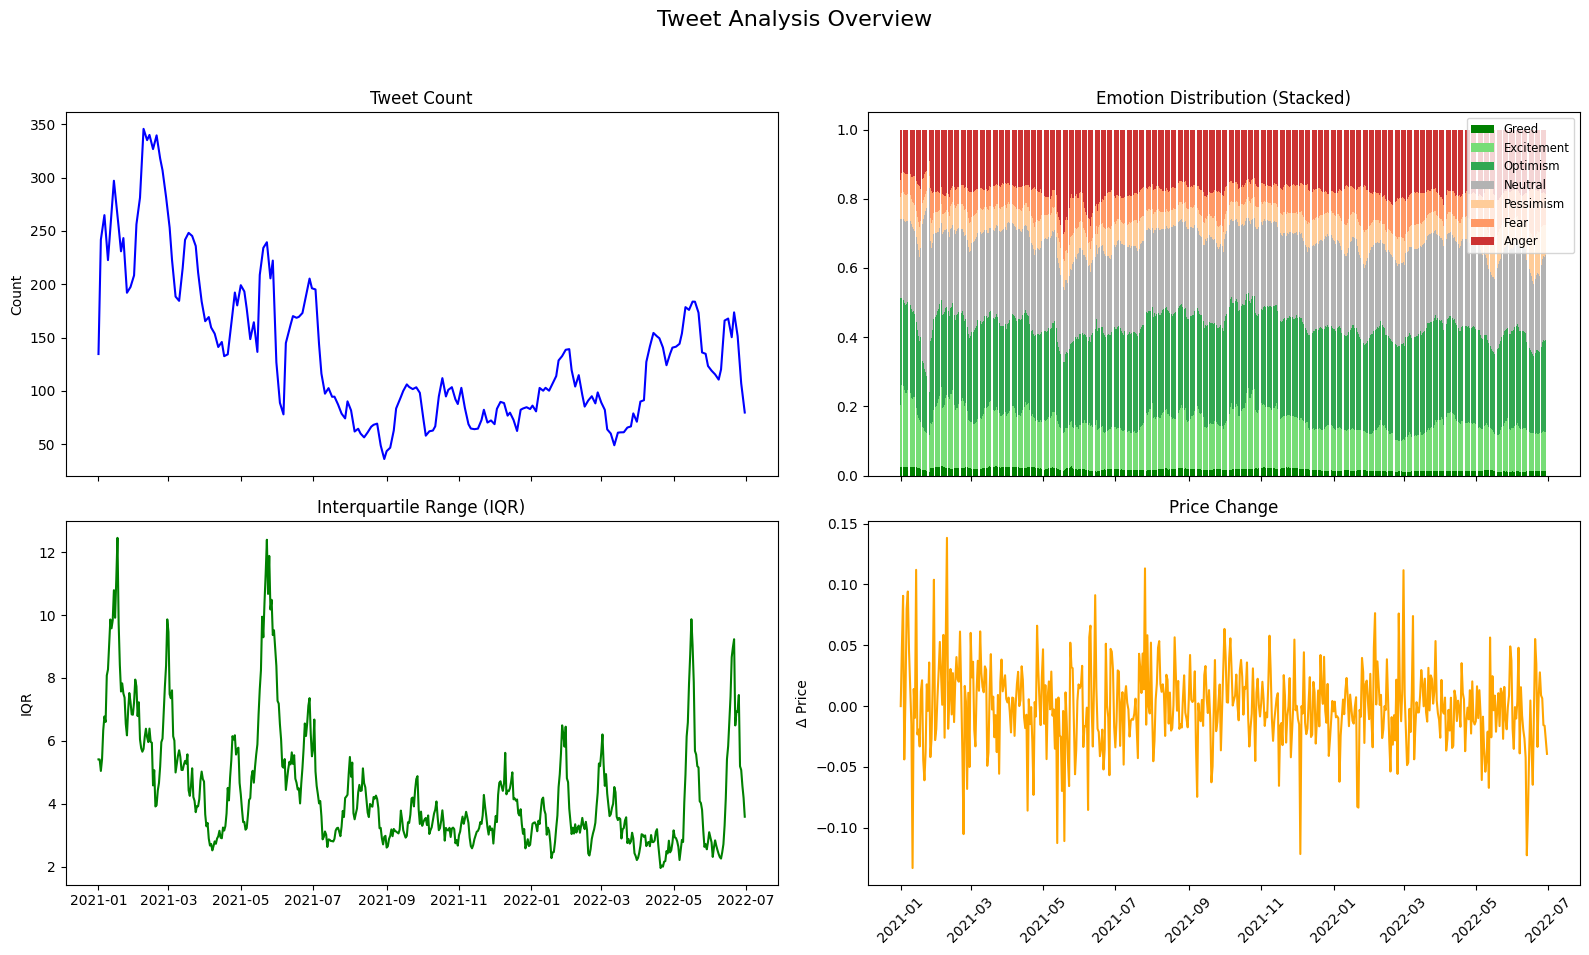

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Data Chunks/input.csv', parse_dates=['date'])

# Set the date as index for easier plotting
df.set_index('date', inplace=True)

# Emotion columns
emotion_cols = ['Greed', 'Excitement', 'Optimism', 'Neutral', 'Pessimism', 'Fear', 'Anger']

# Custom emotion color palette
emotion_colors = {
    "Greed": "#008000",      # Strong Green (Best)
    "Optimism": "#32A852",   # Medium Green
    "Excitement": "#77DD77", # Light Green (Least Good)
    "Neutral": "#B3B3B3",    # Neutral Gray
    "Pessimism": "#FFCC99",  # Light Orange (Least Bad)
    "Fear": "#FF9966",       # Medium Orange
    "Anger": "#CC3333",      # Strong Red (Worst)
}

# Create a 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)
fig.suptitle('Tweet Analysis Overview', fontsize=16)

# First plot: Tweet Count
axs[0, 0].plot(df.index, df['Tweet Count'], color='blue')
axs[0, 0].set_title('Tweet Count')
axs[0, 0].set_ylabel('Count')

# Second plot: Stacked Bar Plot of 7 Emotions
bottom = pd.Series([0] * len(df), index=df.index)
for emotion in emotion_cols:
    axs[0, 1].bar(df.index, df[emotion], bottom=bottom, label=emotion, color=emotion_colors[emotion])
    bottom += df[emotion]
axs[0, 1].set_title('Emotion Distribution (Stacked)')
axs[0, 1].legend(loc='upper right', fontsize='small')

# Third plot: IQR
axs[1, 0].plot(df.index, df['IQR'], color='green')
axs[1, 0].set_title('Interquartile Range (IQR)')
axs[1, 0].set_ylabel('IQR')

# Fourth plot: Price
axs[1, 1].plot(df.index, df['Price'], color='orange')
axs[1, 1].set_title('Price Change')
axs[1, 1].set_ylabel('Δ Price')

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
